In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_autocorrelation(x, max_lag=None):
    """
    Plots the autocorrelation function of a 1D NumPy array.
    
    Parameters:
    - x: 1D numpy array
    - max_lag: maximum lag to compute autocorrelation for (default: len(x)//2)
    """
    x = np.asarray(x)
    x = x - np.mean(x)
    n = len(x)
    if max_lag is None:
        max_lag = n // 2

    acf = np.correlate(x, x, mode='full') / (np.var(x) * n)
    acf = acf[n-1:n+max_lag]  # extract lags from 0 to max_lag

    lags = np.arange(0, max_lag + 1)
    plt.stem(lags, acf)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation Function')
    plt.grid(True)
    plt.show()

### Run 1: MCMC
Average acceptance rate: 0.621 MCMC scale: 0.9197301832228684 

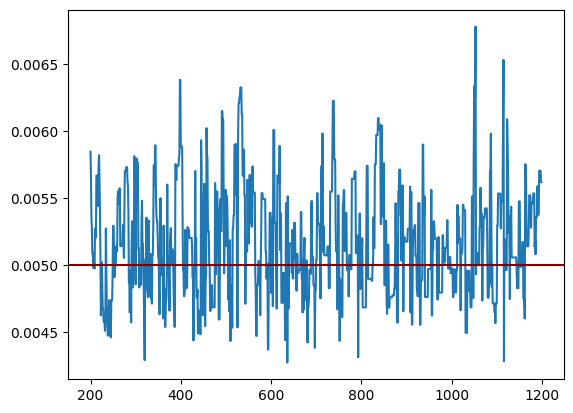

In [3]:
data = pd.read_csv("~/fv_sim/basicmcmcsamples.csv", header=None)[200:]
plt.plot(data)
plt.axhline(y=0.005, color='maroon')
plt.show()

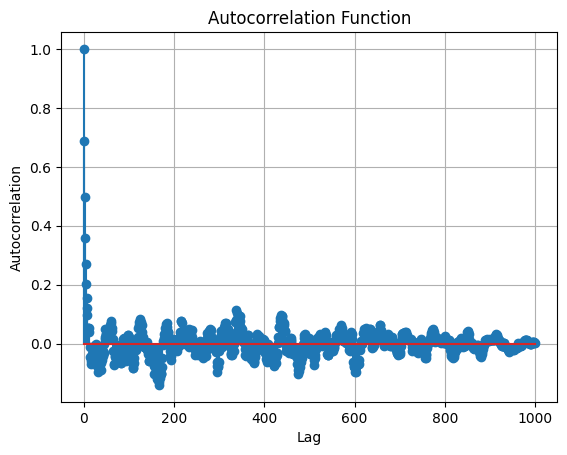

In [4]:
plot_autocorrelation(data.to_numpy().reshape(-1), len(data)-1)

0    0.00517
dtype: float64 0    0.033966
dtype: float64


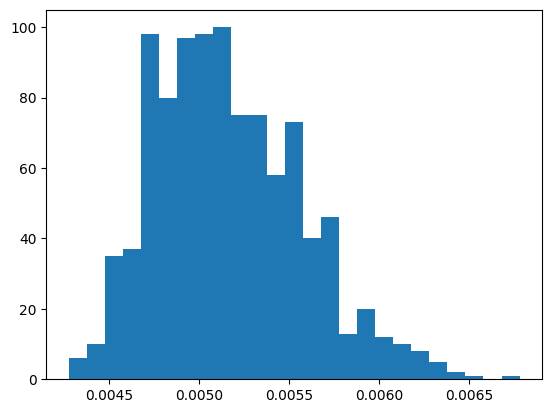

In [5]:
plt.hist(data, bins=25)
print(data.mean(), np.abs(data.mean()-0.005)/0.005)

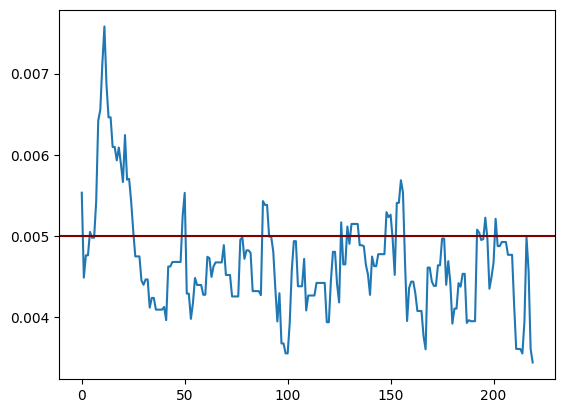

In [6]:
data = pd.read_csv("~/fv_sim/samples.csv", header=None)
plt.plot(data)
plt.axhline(y=0.005, color='maroon')
plt.show()

In [7]:
chain = np.array(data)
difference = chain[1:] - chain[:-1]
acceptance = (np.sum(difference != 0)+1)/201
np.sqrt(np.var(difference[difference != 0])), acceptance

(np.float64(0.0004333943868664921), np.float64(0.7164179104477612))

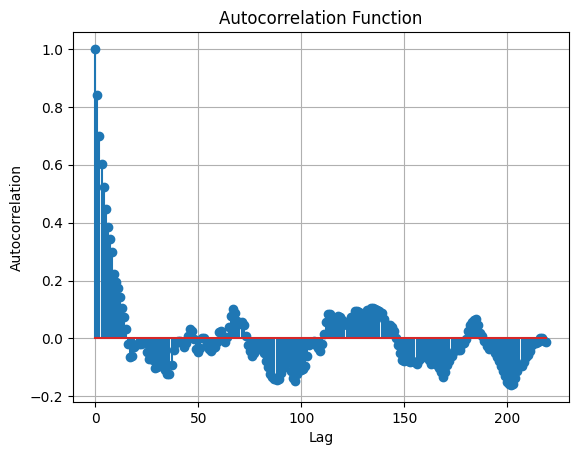

In [8]:
plot_autocorrelation(data.to_numpy().reshape(-1), len(data)-1)

0.004678975287682907 0.06420494246341858


/tmp/ipykernel_3460719/674096263.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(float(data.mean()), float(np.abs(data.mean()-0.005)/0.005))


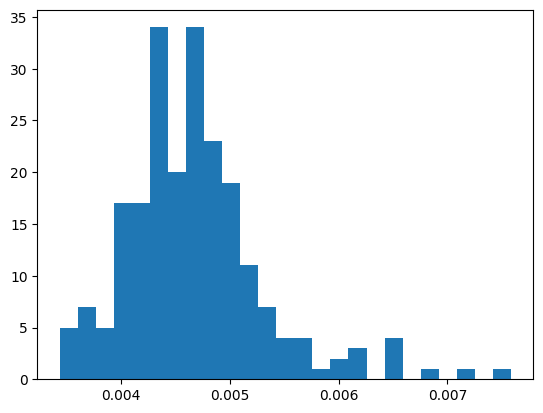

In [9]:
plt.hist(data, bins=25)
print(float(data.mean()), float(np.abs(data.mean()-0.005)/0.005))

In [10]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([2, 2.5, 4, 5, 6])
c = np.array([1, 3, 2, 4, 5])
not ((c >= a).all() and (c <= b).all())

True

In [11]:
diff = b-a
np.exp(-np.sum(np.log(diff)))

np.float64(2.0)

In [12]:
import numpy as np
mean = np.array([1, 2])
cov = np.array([[1, 0], [0, 1]])
len(mean), len(cov)

(2, 2)

In [13]:
from distributions import Normal, Uniform
import numpy as np
prior = Uniform(upper=np.ones(2), lower=np.zeros(2))
likelihood = Normal(mean=np.zeros(2), cov=np.eye(2))
likelihood1d = Normal()

In [14]:
likelihood.sample(10)[0]

array([ 0.38938388, -1.57965781])

In [15]:
int(np.ceil(1.5))

2

Average acceptance rate: 0.66 MCMC scale: 0.8285477443473125

In [16]:
import ast

def process_mcmc_chain(filepath):
    with open(filepath, 'r') as f:
        lines = [line.strip() for line in f if line.strip() != '']

    chain = []
    i = 0

    while i < len(lines):
        line = lines[i]

        if line.startswith('['):
            current_value = ast.literal_eval(line)
            if not chain:
                # First value is always accepted
                chain.append(current_value)
            else:
                if i + 1 < len(lines) and lines[i + 1] == 'accept':
                    chain.append(current_value)
                    i += 1  # Skip the 'accept' line
                else:
                    # If not accepted, repeat the last value in the chain
                    chain.append(chain[-1])
        i += 1

    return chain

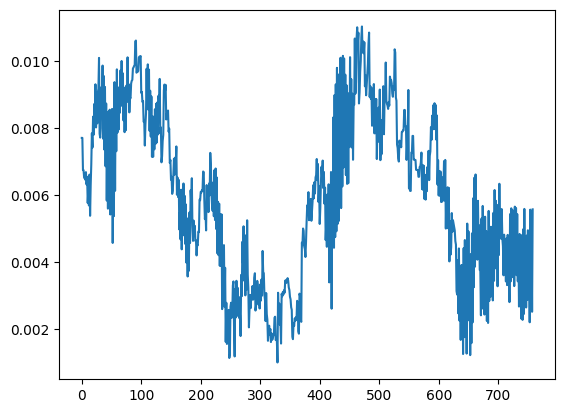

In [17]:
import numpy as np

with open('m.txt') as f:
    lines = f.readlines()

# Strip brackets and commas, then convert to float
data = [float(line.strip().replace('[', '').replace(']', '').replace(',', '')) for line in lines]

mlmcmc_data = np.array(data)

# Now you can plot it
import matplotlib.pyplot as plt
plt.plot(mlmcmc_data)
plt.show()


In [18]:
chain_0 = mlmcmc_data[:500]
chain_1_fine = mlmcmc_data[500:750]
chain_1_coarse = mlmcmc_data[750:1000]
chain_2_fine = mlmcmc_data[1000:1125]
chain_2_coarse = mlmcmc_data[1125:]

0.005100055006523949


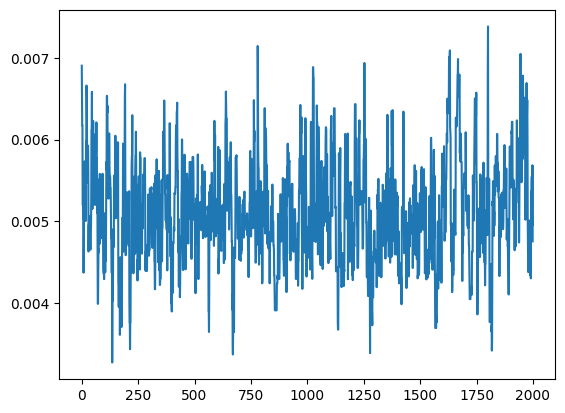

In [19]:
sanity_check_data = np.loadtxt("sanitycheck1.csv", delimiter = ',')
plt.plot(sanity_check_data)
print(sanity_check_data.mean())

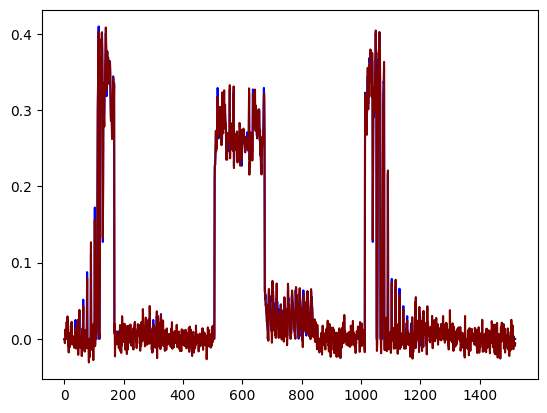

In [20]:
observed_data = np.loadtxt("observed_data.csv", delimiter=',')
observed_data_noise = np.loadtxt("observed_data_noise.csv", delimiter =',')
plt.plot(observed_data, color='blue')
plt.plot(observed_data_noise, color='maroon')

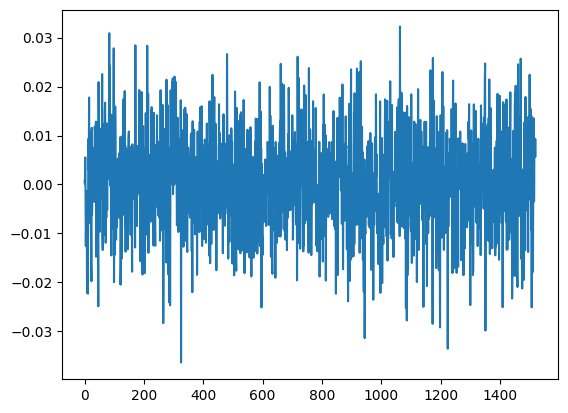

In [21]:
plt.plot(observed_data - observed_data_noise)

In [22]:
def save_data(self, filename='MLMCMC_samples.csv'):
        for level in range(len(self)):
            if not level:
                if not len(self[level]):
                    raise ValueError("Chain 0 has not been generated yet.")
                data = self[0]
            else:
                if not (len(self[level][0]) or len(self[level][1])):
                    raise ValueError(f"Chain {level} has not been generated yet.")
                data = np.concatenate([data, self[level][0],
                                    self[level][1]])
        print(data.shape)

In [23]:
self = [np.arange(10), [np.arange(5), np.arange(5)], [np.arange(3), np.arange(3)]]
save_data(self)

(26,)


In [63]:
actualrundata = np.loadtxt("data_generation/bestmlmcmcsofar/MLMCMC_samples.csv", delimiter=',')
len(actualrundata)

4000

In [64]:
samples = [1000, 1000, 500]
c00 = actualrundata[:samples[0]]
c11 = actualrundata[samples[0]:samples[0]+samples[1]]
c10 = actualrundata[samples[0]+samples[1]:samples[0]+2*samples[1]]
c22 = actualrundata[samples[0]+2*samples[1]:samples[0]+2*samples[1]+samples[2]]
c21 = actualrundata[samples[0]+2*samples[1]+samples[2]:]

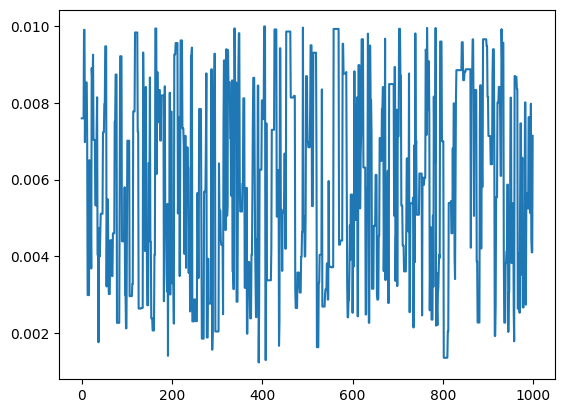

In [65]:
plt.plot(c00)

In [66]:
c00[200:].mean()

np.float64(0.00593762869348632)

In [67]:
burnin = 200
a, b, c, d, e = c00[burnin:].mean(), c11[burnin:].mean(), c10[burnin:].mean(), c22[burnin//2:].mean(), c21[burnin//2:].mean()
a, b, c, d, e

(np.float64(0.00593762869348632),
 np.float64(0.005551379727215016),
 np.float64(0.005826776830942793),
 np.float64(0.005227236637080936),
 np.float64(0.005728426291904835))

In [70]:
a + b - c + d - e

np.float64(0.005161041934934645)

In [44]:
def autocorrelation(data, lag):
    """
    Calculate autocorrelation of data at lag value.
    """
    if not lag:
        return 1
    elif lag < 0 or lag % 1:
        raise ValueError("lag must be a non-negative integer.")
    x_t = data[:-lag]
    x_tn = data[lag:]
    cov = np.cov(x_t, x_tn)[0]
    return cov[1]/cov[0]

def autocorrelation_data(data, total_lag):
    """
    Calculate autocorrelation data from lag=0 to lag=total_lag.
    """
    ac_values = [1]
    for i in range(1, total_lag+1):
        ac_values.append(autocorrelation(data, i))
    return ac_values

def ess(data, total_lag):
    data = np.asarray(data, dtype=float)
    n = data.size
    if n < 3:
        return float(n)
    if total_lag is None:
        total_lag = n - 2
    s = 0.0
    for k in range(1, total_lag + 1):
        rk = autocorrelation(data, k)
        if not np.isfinite(rk) or rk <= 0:
            break
        s += rk
    tau = 1 + 2*s
    return n / tau

generate charts stuff

In [ ]:
data = np.loadtxt("data_generation/goodmcmc/MLMCMC_samples.csv")[300:]

In [60]:
data = c22[100:]

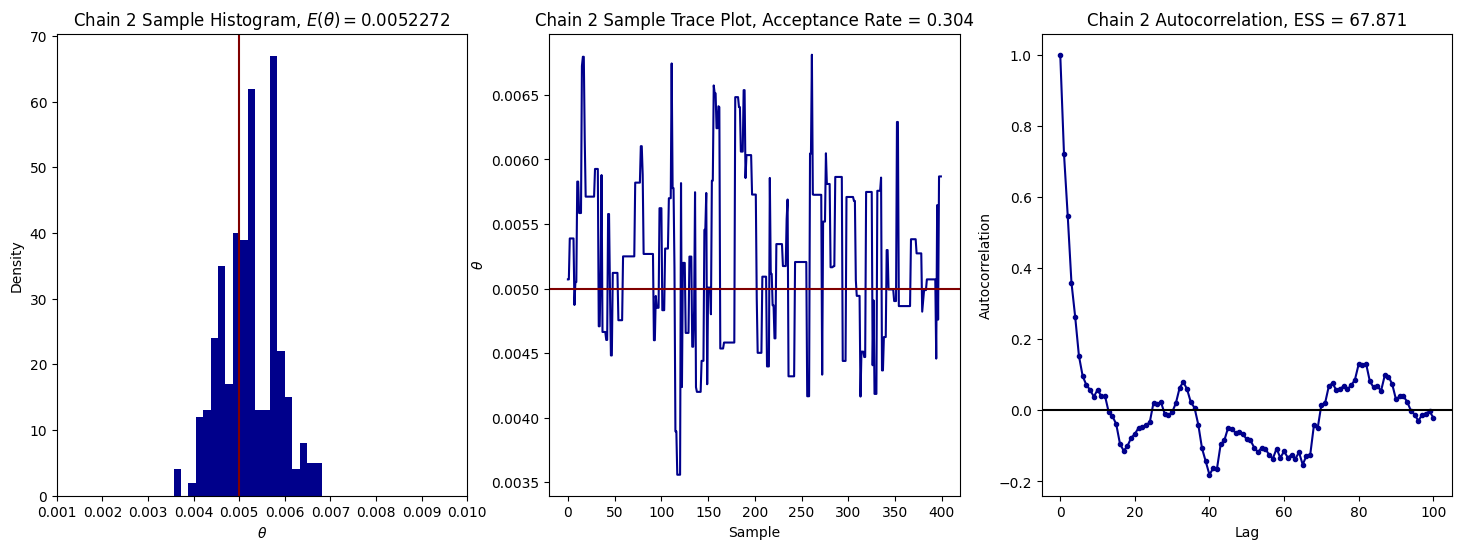

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
ax1.hist(data, bins=20, color='darkblue')
ax1.axvline(x=0.005, color='maroon')
ax1.set_xbound(0.001, 0.01)
ax1.set_ylabel("Density")
ax1.set_xlabel(r"$\theta$")
ax1.set_title(r"Chain 2 Sample Histogram, $E\left(\theta\right) =$" + f"{data.mean():.5}")
ax2.plot(data, color='darkblue')
ax2.axhline(y=0.005, color='maroon')
ax2.set_ylabel(r"$\theta$")
ax2.set_xlabel("Sample")
ax2.set_title("Chain 2 Sample Trace Plot, Acceptance Rate = 0.304")
ax3.plot(autocorrelation_data(data, 100), marker='.', color='darkblue')
ax3.axhline(y=0, color='k')
ax3.set_ylabel("Autocorrelation")
ax3.set_xlabel("Lag")
ax3.set_title(f"Chain 2 Autocorrelation, ESS = {ess(data, 100):.5}")

plt.show()